### Schema

0. x coordinate
1. y coordinate
2. timestamp
3. pen-up
4. azimuth angle
5. altitude angle
6. Pressure

In [1]:
import pandas as pd
from os import path
import sys

#adding local modules
module_path = path.abspath(path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from preprocess.biodarw_feature_extraction import extract_residues, extract_radio

#plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.style.use('seaborn-notebook')


In [2]:
doc_path = "/data/elekin/doc"
metadata_file = path.join(doc_path,"Temblor-RMN(depurada-controles-ethw)IS.xlsx")
metadf=pd.read_excel(metadata_file)
metadf=metadf[metadf.etona]
coefficients=17
clinica="T002"
control="C01"

In [3]:
def get_abs_path(df, registro_tableta, idx=0):
    return df[(df['registro tableta'] == registro_tableta) & (df.etona == True)].abs_path

In [4]:
filename=get_abs_path(metadf, clinica)
filename

187    /data/elekin/data/origin/ethw/protocolo_temblo...
Name: abs_path, dtype: object

In [5]:
filenameC=get_abs_path(metadf, control)
filenameC

1    /data/elekin/data/origin/ethw/Controles30jun14...
2    /data/elekin/data/origin/ethw/Controles30jun14...
Name: abs_path, dtype: object

In [6]:
#features=['x','y','timestamp','pen_up','azimuth','altitude','pressure']
features=['x','y','timestamp','pen_up','pressure']
data = pd.read_csv(filename.iloc[0], sep="\s+",header=None,names=features,skiprows=1,usecols=[0,1,2,3,6])
control = pd.read_csv(filenameC.iloc[1], sep="\s+",header=None,names=features,skiprows=1,usecols=[0,1,2,3,6])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   x          1735 non-null   int64
 1   y          1735 non-null   int64
 2   timestamp  1735 non-null   int64
 3   pen_up     1735 non-null   int64
 4   pressure   1735 non-null   int64
dtypes: int64(5)
memory usage: 67.9 KB


In [8]:
data.head(10)

,x,y,timestamp,pen_up,pressure
0,5791,4520,925180,1,334
1,5791,4520,925188,0,0
2,5769,4471,925195,0,0
3,5749,4432,925203,0,0
4,5721,4385,925210,0,0
5,5685,4330,925218,0,0
6,5838,4451,925356,0,0
7,5837,4446,925378,0,0
8,5829,4436,925386,0,0
9,5500,4231,925516,0,0


In [9]:
data['r'] = extract_radio(data)
control['r'] = extract_radio(control)

data['rd']=extract_residues(data,c=coefficients)
control['rd']=extract_residues(control,c=coefficients)

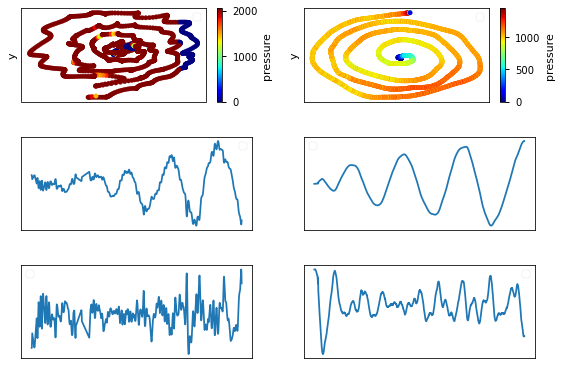

In [10]:
fig, axes=plt.subplots(3,2)
fig.tight_layout()

data.plot.scatter("x","y",c="pressure",cmap="jet", ax=axes[0][0])
data.plot(x=2,y='r', ax=axes[1][0])
data.plot(x=2,y='rd', ax=axes[2][0])


control.plot.scatter("x","y",c="pressure",cmap="jet", ax=axes[0][1])
control.plot(x=2,y='r', ax=axes[1][1])
control.plot(x=2,y='rd', ax=axes[2][1])



for row in axes:
    for ax in row:
        ax.legend([])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(None)